## Name: Jose Aries E. De Los Santos

In [ ]:
#@title Define the Logarithmic Barrier Function and its gradient

#Import Necessary Modules
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Define the objective function
def fun(vars):
    x, y = vars
    return x - 2 * np.log(x) + y**2

def fun1(x):
  '''
  Objective Function
  '''
  return x[0] - 2 * np.log(x[0]) + x[1]**2

def J(x, k):
  '''
  log-barrier function J(x;e)
  '''
  return x[0] - 2 * np.log(x[0]) + x[1]**2 + (1 / 2**k) * (-np.log(3 - x[0]) - np.log(x[0] - 1) - np.log(3 - x[1]) - np.log(x[1] - 1))

def gradient(x, k):
  '''
  Gradient of the log-barrier function J(x;e)
  '''
  grad1 = 1 - (2 / x[0]) + (1/ 2**k) * ((1 / (3 - x[0])) - (1 / (x[0] - 1)))
  # grad1 = 1 - (2 / x[0]) + (1/ 2**k) * ((4-2*x[0] / (3 - x[0])*(x[0] - 1)))
  grad2 = 2 * x[1] + (1 / 2**k) * ((1 / (3 - x[1])) - (1 / (x[1] - 1)))
  return np.array([grad1, grad2])

x0 = np.array([2.05,2.75]); max_iter = 3000
k = 0; c1 = 0.8; s = 0.08; beta = 0.5;
path = [(x0[0],x0[1])]
for _ in range(max_iter):
  grad = gradient(x0, k)
  #Armijo's Condition
  m = 0; alpha = np.power(beta,m)*s
  # while J(x0 - alpha*gradient(x0, k).T,k) - J(x0,k) > - c1 * alpha*np.dot(gradient(x0, k).T,gradient(x0, k)):
  while fun1(x0 - alpha*gradient(x0, k).T) - fun(x0) > - c1 *alpha*np.dot(gradient(x0, k).T,gradient(x0, k)):
    m = m + 1
    alpha = np.power(beta,m)*s
  x = x0 - alpha*grad #Steepest Descent
  x0 = x
  # Ensure x and y remain within the bounds
  x0[0] = np.clip(x0[0], 1 + 1e-6, 3 - 1e-6)
  x0[1] = np.clip(x0[1], 1 + 1e-6, 3 - 1e-6)
  k = k + 1
  path.append([x0[0],x0[1]])

print(f"Optimal value of x = {x0[0]}")
print(f"Optimal Value of y = {x0[1]}")
print(f"Value of the Logarithmic Barrier Function {J(x0,k)}")
print(f"Value of the Objective Function {fun1(x0)}")

Optimal value of x = 2.0000000000000053
Optimal Value of y = 1.000001
Value of the Logarithmic Barrier Function 1.6137076388811094
Value of the Objective Function 1.6137076388811094


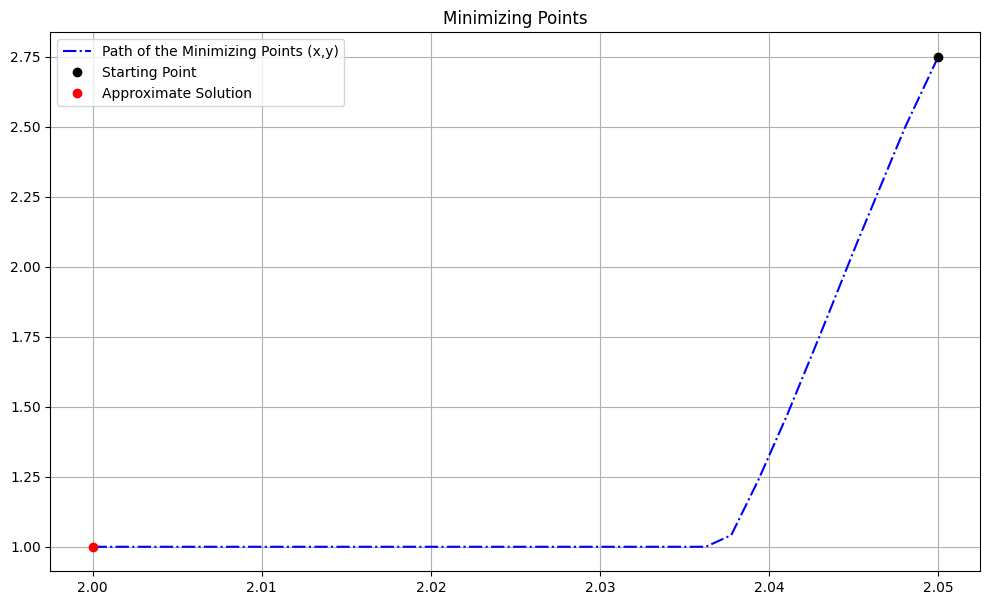

In [ ]:
#@title Plot of the Minimizing Points
path = np.array(path)
path_x = path[:, 0]
path_y = path[:, 1]

plt.figure(figsize=(12, 7))
plt.plot(path_x, path_y, "-.", color="#0000FF",label='Path of the Minimizing Points (x,y)')
plt.plot(path_x[0],path_y[0],"o", linewidth=10.0, color="#000000",label="Starting Point")
plt.plot(x0[0],x0[1],"o", linewidth=10.0, color="#FF0000",label="Approximate Solution")
plt.legend()
plt.title("Minimizing Points")
plt.grid(True)
plt.show()

In [ ]:
#@title Constraint Optimization (Optional)
import numpy as np
from scipy.optimize import minimize

# Define the objective function
def objective(vars):
    x, y = vars
    return x - 2 * np.log(x) + y**2

# Set the bounds for x and y
bounds = [(1, 3), (1, 3)]

# Initial guess for the variables
initial_guess = [10, 10]

# Perform the optimization
result = minimize(objective, initial_guess, bounds=bounds, method='L-BFGS-B')

# Print the result
print("Optimal value of x and y:", result.x)
print("Minimum value of the objective function:", result.fun)


Optimal value of x and y: [2.00000021 1.        ]
Minimum value of the objective function: 1.6137056388801208
